In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
path = '/home/guzel/Downloads/archive/all-data.csv'

In [8]:
df = pd.read_csv(path)

In [9]:
df

,sentiment,text,Unnamed: 2,Unnamed: 3
0,neutral,"According to Gran , the company has no plans t...",NaN,NaN
1,neutral,Technopolis plans to develop in stages an area...,NaN,NaN
2,negative,The international electronic industry company ...,NaN,NaN
3,positive,With the new production plant the company woul...,NaN,NaN
4,positive,According to the company 's updated strategy f...,NaN,NaN
...,...,...,...,...
4841,negative,LONDON MarketWatch -- Share prices ended lower...,NaN,NaN
4842,neutral,Rinkuskiai 's beer sales fell by 6.5 per cent ...,NaN,NaN
4843,negative,Operating profit fell to EUR 35.4 mn from EUR ...,NaN,NaN
4844,negative,Net sales of the Paper segment decreased to EU...,NaN,NaN


In [4]:
target = df['sentiment']
data = df.drop('sentiment', axis = 1)

In [5]:
import numpy as np
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data,target, test_size=0.33, random_state=42)

## EDA

In [43]:
#conda install -c conda-forge wordcloud=1.6.0 

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.10.1
  latest version: 23.1.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/guzel/anaconda3

  added / updated specs:
    - wordcloud=1.6.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-4.12.0               |   py38h578d9bd_0         1.0 MB  conda-forge
    python_abi-3.8             |           2_cp38           4 KB  conda-forge
    wordcloud-1.6.0            |   py38h516909a_0         187 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         1.2 MB

The following NEW packages will be INSTALLED:

  python_abi         conda-forge/

<ipython-input-10-31102ef4e76e>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_pos = X_train[df['sentiment'] == 'positive']
<ipython-input-10-31102ef4e76e>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_neg = X_train[df['sentiment'] == 'negative']


Positive words


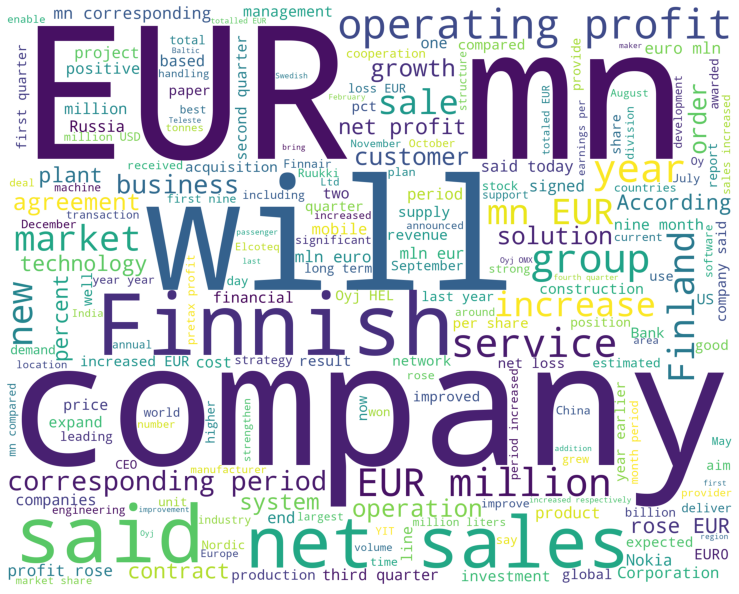

Negative words


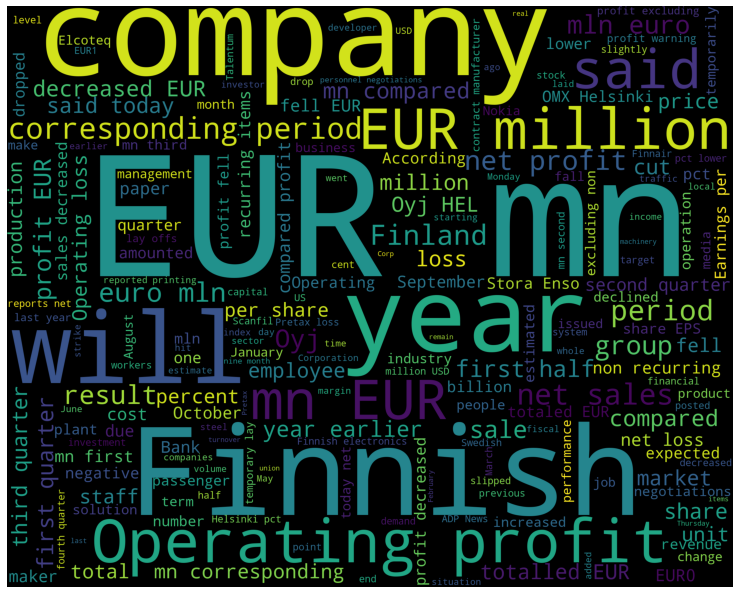

In [10]:
train_pos = X_train[df['sentiment'] == 'positive']
train_pos = train_pos['text']
train_neg = X_train[df['sentiment'] == 'negative']
train_neg = train_neg['text']

from wordcloud import WordCloud,STOPWORDS

def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(train_pos,'white')
print("Negative words")
wordcloud_draw(train_neg)

Neutral words


<ipython-input-12-c567d001898e>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train_neu = X_train[df['sentiment'] == 'neutral']


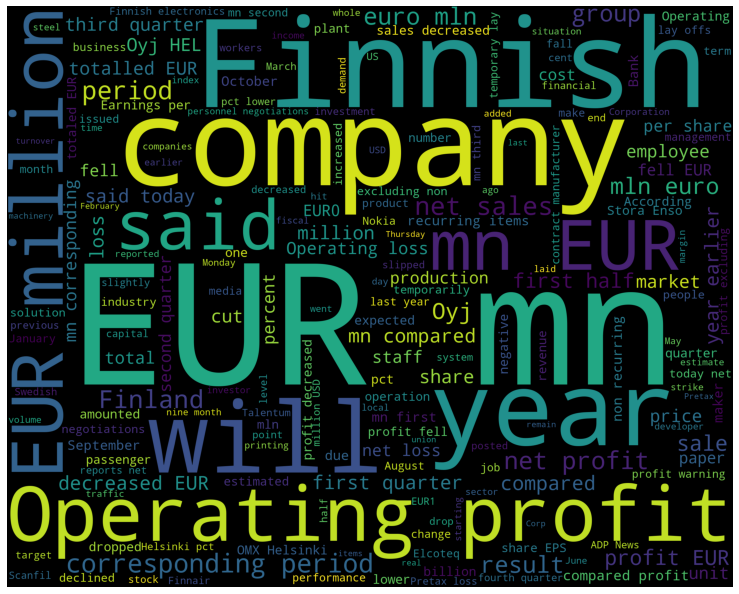

In [12]:
print("Neutral words")
train_neu = X_train[df['sentiment'] == 'neutral']
train_neu = train_neu['text']
wordcloud_draw(train_neg)

Interesting to notice the following words and expressions are both in the positive and negative word sets: EUR(cash), finnish, financial, said, company. It means these words can be considered as neutral.This fact is confirmed by the fact that these words occur in a cloud of neutral news

The positive set includes inresed EUR, while negative set includes fell EURO. 
In my interpretation, currency rate is strongly connected with economics health. So raise of euro is assosiated with economics growth.


<AxesSubplot:xlabel='sentiment'>

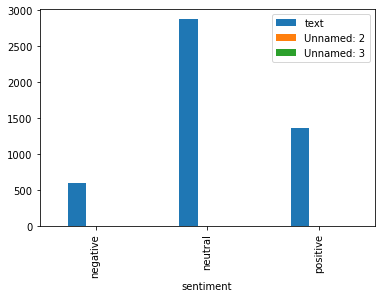

In [13]:
df.groupby('sentiment').count().plot(kind='bar')

Let's have a look at distribution. It shows that most of the words are neutral, negative words are least. So data classes are unbalanced.

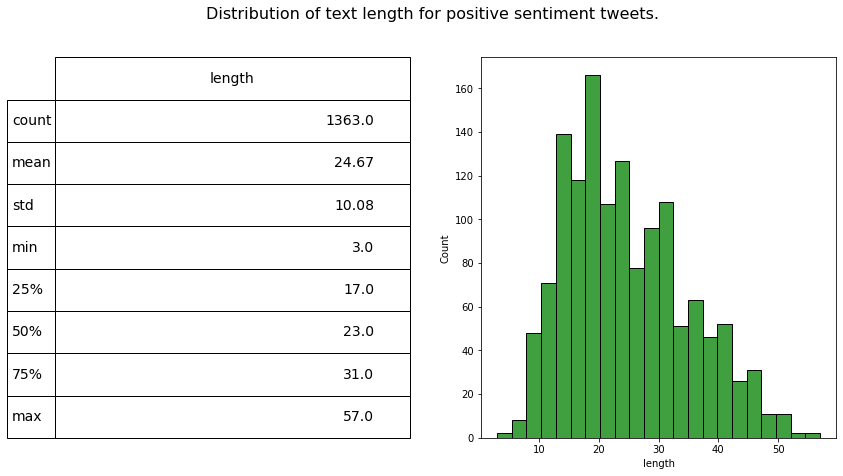

In [17]:
import seaborn as sns
fig = plt.figure(figsize=(14,7))
df['length'] = df.text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['sentiment']=='positive']['length'], ax=ax1,color='green')
describe = df.length[df.sentiment=='positive'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for positive sentiment tweets.', fontsize=16)

plt.show()

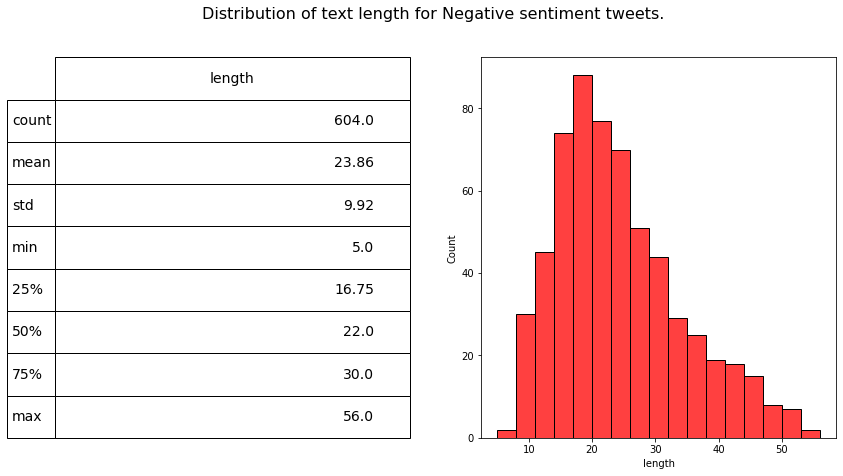

In [18]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['sentiment']=='negative']['length'], ax=ax1,color='red')
describe = df.length[df.sentiment=='negative'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for Negative sentiment tweets.', fontsize=16)

plt.show()

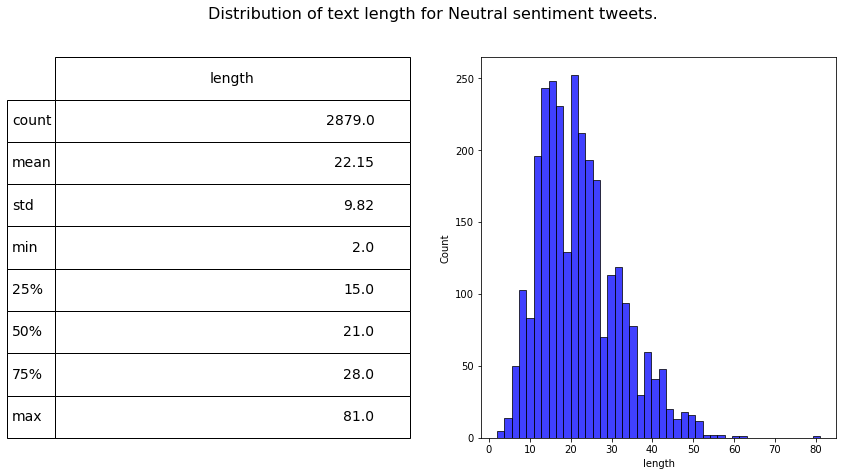

In [20]:
fig = plt.figure(figsize=(14,7))
df['length'] = df.text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df[df['sentiment']=='neutral']['length'], ax=ax1,color='blue')
describe = df.length[df.sentiment=='neutral'].describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for Neutral sentiment tweets.', fontsize=16)

plt.show()

2       36
415     29
421     30
423     30
500     23
        ..
4840    40
4841    26
4843    23
4844    44
4845    19
Name: length, Length: 604, dtype: int64

Let's find out if there is a statistically significant difference between the means of the pairs of distributions.

H_0: There is no significant difference in distributions

H_1: There is significant difference in mean of distributions

In [26]:
from scipy.stats import chisquare
from scipy.stats import ttest_ind

length_neg = df.loc[df['sentiment']=='negative']['length']
length_pos = df.loc[df['sentiment']=='positive']['length']
length_neu = df.loc[df['sentiment']=='neutral']['length']

stat, p_value = ttest_ind(length_neg, length_pos)
print(f"t-test negative vs positive: statistic={stat:.4f}, p-value={p_value:.4f}")

stat, p_value = ttest_ind(length_neg, length_neu)
print(f"t-test negative vs neutral : statistic={stat:.4f}, p-value={p_value:.4f}")

stat, p_value = ttest_ind(length_neu, length_pos)
print(f"t-test positive vs neutral : statistic={stat:.4f}, p-value={p_value:.4f}")

t-test negative vs positive: statistic=-1.6538, p-value=0.0983
t-test negative vs neutral : statistic=3.8930, p-value=0.0001
t-test positive vs neutral : statistic=-7.7526, p-value=0.0000


For the pair negative and positive we 